In [1]:
import malaya_speech
import numpy as np

In [2]:
vad = malaya_speech.vad.webrtc()

In [3]:
file = malaya_speech.streaming.record(vad)
file

saved audio to savewav_2020-09-06_21-48-43_174842.wavo exit) ...| Listening (ctrl-C to exit) ... Listening (ctrl-C to exit) ...\ Listening (ctrl-C to exit) ...| Listening (ctrl-C to exit) .../ Listening (ctrl-C to exit) ...- Listening (ctrl-C to exit) ...\ Listening (ctrl-C to exit) ...| Listening (ctrl-C to exit) .../ Listening (ctrl-C to exit) ...- Listening (ctrl-C to exit) ...\ Listening (ctrl-C to exit) ...| Listening (ctrl-C to exit) .../ Listening (ctrl-C to exit) ...- Listening (ctrl-C to exit) ...\ Listening (ctrl-C to exit) ...| Listening (ctrl-C to exit) .../ Listening (ctrl-C to exit) ...- Listening (ctrl-C to exit) ...\ Listening (ctrl-C to exit) ...| Listening (ctrl-C to exit) .../ Listening (ctrl-C to exit) ...- Listening (ctrl-C to exit) ...\ Listening (ctrl-C to exit) ...| Listening (ctrl-C to exit) .../ Listening (ctrl-C to exit) ...- Listening (ctrl-C to exit) ...\ Listening (ctrl-C to exit) ...| Listening (ctrl-C to exit) .../ Listening (ctrl-C to exit) ...- Listeni

'savewav_2020-09-06_21-48-43_174842.wav'

In [4]:
import IPython.display as ipd
ipd.Audio(file)

In [5]:
y, sr = malaya_speech.utils.read.wav(file)

In [6]:
vad = malaya_speech.vad.webrtc(sample_rate = sr, minimum_amplitude = int(np.quantile(np.abs(y), 0.2)))

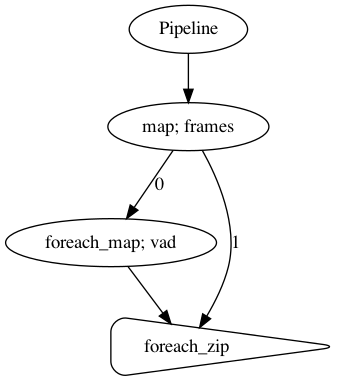

In [7]:
from malaya_speech import Pipeline

p = Pipeline()
frame = p.map(malaya_speech.utils.generator.frames)
vad_map = frame.foreach_map(vad)
foreach = frame.foreach_zip(vad_map)
p.visualize()

In [8]:
result = p(y)
result.keys()

dict_keys(['frames', 'vad', 'foreach_zip'])

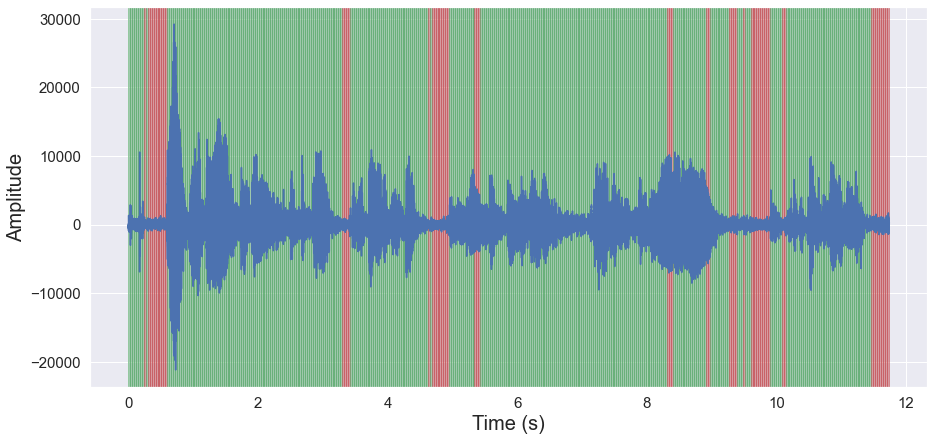

In [9]:
malaya_speech.extra.visualization.visualize_vad(y, result['foreach_zip'], sr)